# Components of $\mathbf{J} \cdot \mathbf{E}'$

Date Created: 5-Nov-2025

Date Modified: 6-Nov-2025

Author: Regis John

In [1]:
import pyspedas
import numpy as np

In [2]:
trange = ['2015-12-09/05:03:55', '2015-12-09/05:03:59']

Reading in particle, magnetic and electric field data:

In [3]:
fpi_vars = pyspedas.mms.fpi(trange=trange, 
                            datatype=['des-dist', 'dis-dist', 'des-moms', 'dis-moms'], 
                            level='l2', 
                            data_rate='brst',
                            varnames=['mms1_des_numberdensity_brst',
                                       'mms1_dis_bulkv_gse_brst',
                                       'mms1_des_bulkv_gse_brst'],
                            time_clip=True)

07-Nov-25 10:41:43: Loading files for group: probe: 1, drate: brst, level: l2, datatype: des-dist, after sorting and filtering:
07-Nov-25 10:41:43: /Users/rejohn/Data_Speedas/mms/mms1/fpi/brst/l2/des-dist/2015/12/09/mms1_fpi_brst_l2_des-dist_20151209050044_v3.3.0.cdf
07-Nov-25 10:41:43: Loading files for group: probe: 1, drate: brst, level: l2, datatype: dis-dist, after sorting and filtering:
07-Nov-25 10:41:43: /Users/rejohn/Data_Speedas/mms/mms1/fpi/brst/l2/dis-dist/2015/12/09/mms1_fpi_brst_l2_dis-dist_20151209050044_v3.3.0.cdf
07-Nov-25 10:41:43: Loading files for group: probe: 1, drate: brst, level: l2, datatype: des-moms, after sorting and filtering:
07-Nov-25 10:41:43: /Users/rejohn/Data_Speedas/mms/mms1/fpi/brst/l2/des-moms/2015/12/09/mms1_fpi_brst_l2_des-moms_20151209050044_v3.3.0.cdf
07-Nov-25 10:41:43: Loading files for group: probe: 1, drate: brst, level: l2, datatype: dis-moms, after sorting and filtering:
07-Nov-25 10:41:43: /Users/rejohn/Data_Speedas/mms/mms1/fpi/brst/l2/

In [4]:
fgm_vars = pyspedas.mms.fgm(trange=trange, probe=1, data_rate='brst',
                            varformat='mms1_fgm_b_gse_brst_l2', time_clip=True)

07-Nov-25 10:41:47: Loading files for group: probe: 1, drate: brst, level: l2, datatype: , after sorting and filtering:
07-Nov-25 10:41:47: /Users/rejohn/Data_Speedas/mms/mms1/fgm/brst/l2/2015/12/09/mms1_fgm_brst_l2_20151209050044_v4.22.0.cdf


In [5]:
edp_vars = pyspedas.mms.edp(trange=trange,
                            probe=1,
                            data_rate='brst',
                            varnames=['mms1_edp_dce_gse_brst_l2', 'mms1_edp_dce_par_epar_brst_l2'],
                            time_clip=True)

07-Nov-25 10:41:47: Loading files for group: probe: 1, drate: brst, level: l2, datatype: dce, after sorting and filtering:
07-Nov-25 10:41:47: /Users/rejohn/Data_Speedas/mms/mms1/edp/brst/l2/dce/2015/12/09/mms1_edp_brst_l2_dce_20151209050044_v2.2.0.cdf


In [6]:
fpi_vars, fgm_vars, edp_vars

(['mms1_dis_bulkv_gse_brst',
  'mms1_des_bulkv_gse_brst',
  'mms1_des_numberdensity_brst'],
 ['mms1_fgm_b_gse_brst_l2',
  'mms1_fgm_b_gse_brst_l2_bvec',
  'mms1_fgm_b_gse_brst_l2_btot'],
 ['mms1_edp_dce_par_epar_brst_l2', 'mms1_edp_dce_gse_brst_l2'])

In [7]:
pyspedas.tplot_rename('mms1_dis_bulkv_gse_brst', 'bulk_vi_gse')
pyspedas.tplot_rename('mms1_des_bulkv_gse_brst', 'bulk_ve_gse')
pyspedas.tplot_rename('mms1_des_numberdensity_brst', 'den_e')
pyspedas.tplot_rename('mms1_fgm_b_gse_brst_l2_bvec', 'bvec_gse')
pyspedas.tplot_rename('mms1_edp_dce_gse_brst_l2', 'evec_gse')
pyspedas.tplot_rename('mms1_edp_dce_par_epar_brst_l2', 'epar_gse')

### Downsampling to DES cadence of 30 ms

In [8]:
_, den_e = pyspedas.get_data('den_e')
_, bulk_ve = pyspedas.get_data('bulk_ve_gse')
den_e.shape, bulk_ve.shape

((133,), (133, 3))

In [9]:
# Define target cadence
des_cadence = 0.03  # seconds or 30 ms

In [10]:
# 1. Downsample magnetic field (native ~128 Hz → 33 Hz)
pyspedas.avg_data('bvec_gse', res=des_cadence, newname='bvec_gse_avg')

07-Nov-25 10:41:53: avg_data was applied to: bvec_gse_avg


['bvec_gse_avg']

In [11]:
# 2. Downsample electric field (native 8192 Hz → 33 Hz)
pyspedas.avg_data('evec_gse', res=des_cadence, newname='evec_gse_avg')

07-Nov-25 10:41:53: avg_data was applied to: evec_gse_avg


['evec_gse_avg']

In [12]:
# 3. Downsample parallel electric field (native 8192 Hz → 33 Hz)
pyspedas.avg_data('epar_gse', res=des_cadence, newname='epar_gse_avg')

07-Nov-25 10:41:54: avg_data was applied to: epar_gse_avg


['epar_gse_avg']

In [13]:
# 4. Interpolate ion bulk velocity (native ~6.75 Hz → 33 Hz)
pyspedas.tinterpol( names='bulk_vi_gse', interp_to='bulk_ve_gse', 
                   newname='bulk_vi_gse_interp', method='linear')

07-Nov-25 10:41:55: tinterpol (linear) was applied to: bulk_vi_gse_interp


In [14]:
pyspedas.get_units('den_e'), pyspedas.get_units('bulk_ve_gse'), pyspedas.get_units('bulk_vi_gse_interp')

('cm^-3', 'km/s', 'km/s')

In [15]:
pyspedas.get_units('evec_gse_avg'), pyspedas.get_units('bvec_gse_avg')

('mV/m', 'nT')

In [16]:
times, bulk_ve = pyspedas.get_data('bulk_ve_gse')
_, bulk_vi = pyspedas.get_data('bulk_vi_gse_interp')
_, den_e = pyspedas.get_data('den_e')
_, bvec = pyspedas.get_data('bvec_gse_avg')
_, evec = pyspedas.get_data('evec_gse_avg')

In [17]:
# Converting to SI units
den_e = den_e * 1e6  # Convert from cm^-3 to m^-3
bulk_ve = bulk_ve * 1e3  # Convert from km/s to m/s
bulk_vi = bulk_vi * 1e3  # Convert from km/s to m/s
bvec = bvec * 1e-9  # Convert from nT to T
evec = evec * 1e-3  # Convert from mV/m to V/m

## Calculating $J$:

In [18]:
from scipy.constants import elementary_charge  # e = 1.602176634e-19 C in SI units
ele_charge = elementary_charge

In [19]:
jvec_gse = den_e.reshape(-1, 1) * ele_charge * (bulk_vi - bulk_ve)

## Calculating $E^{\prime}$

In [20]:
bvec.shape, evec.shape

((133, 3), (133, 3))

In [21]:
vxb = np.cross(bvec, evec)

In [22]:
evec_p_gse = evec + vxb

## Rotating $J$ and $E^{\prime}$ into FAC

In [23]:
# Computing the FAC rotation matrix
pyspedas.fac_matrix_make(mag_var_name='bvec_gse_avg', other_dim='Xgse', newname='fac_matrix')

07-Nov-25 10:41:58: store_data: Neither data array nor newname supplied, nothing to do.


'fac_matrix'

In [24]:
_, fac_matrix = pyspedas.get_data('fac_matrix')

In [25]:
jvec_gse.shape, evec_p_gse.shape, fac_matrix.shape

((133, 3), (133, 3), (133, 3, 3))

In [26]:
jvec_fac = np.einsum('ijk,ik->ij', fac_matrix, jvec_gse) # J in FAC
evec_p_fac = np.einsum('ijk,ik->ij', fac_matrix, evec_p_gse) # E' in FAC

## Calculating $J \cdot E^{\prime}$

In [36]:
je_gse = np.einsum('ij,ij->i', jvec_gse, evec_p_gse)  # J·E' in GSE

In [28]:
je_par_fac = jvec_fac[:, 2] * evec_p_fac[:, 2] # Parallel or z-component JdotE'

In [29]:
je_perp1_fac = jvec_fac[:, 0] * evec_p_fac[:, 0]
je_perp2_fac = jvec_fac[:, 1] * evec_p_fac[:, 1]

In [38]:
pyspedas.store_data('je_gse', data={'x': times, 'y': je_gse}, attr_dict={'y': {'units': 'W/m^3', 'label': "J·E' (GSE)"}})
pyspedas.set_coords('je_gse', 'gse')

07-Nov-25 10:52:03: Setting coordinate system for je_gse


True

In [30]:
pyspedas.store_data('je_par_fac', data={'x': times, 'y': je_par_fac}, attr_dict={'y': {'units': 'W/m^3', 'label': "J·E' Parallel (FAC)"}})
pyspedas.set_coords('je_par_fac', 'fac')

07-Nov-25 10:42:02: Setting coordinate system for je_par_fac


True

In [31]:
pyspedas.store_data('je_perp1_fac', data={'x': times, 'y': je_perp1_fac}, attr_dict={'y': {'units': 'W/m^3', 'label': "J·E' Perpendicular 1 (FAC)"}})
pyspedas.set_coords('je_perp1_fac', 'fac')
pyspedas.store_data('je_perp2_fac', data={'x': times, 'y': je_perp2_fac}, attr_dict={'y': {'units': 'W/m^3', 'label': "J·E' Perpendicular 2 (FAC)"}})
pyspedas.set_coords('je_perp2_fac', 'fac')

07-Nov-25 10:42:03: Setting coordinate system for je_perp1_fac
07-Nov-25 10:42:03: Setting coordinate system for je_perp2_fac


True

In [39]:
# Combine the four tplot variables into one
pyspedas.store_data('combined_je', data=['je_gse', 'je_par_fac',
                                           'je_perp1_fac', 'je_perp2_fac'])

True

07-Nov-25 10:55:13: Substituting symbol \perp from STIXGeneral
07-Nov-25 10:55:13: Substituting symbol \perp from STIXGeneral


07-Nov-25 10:55:13: Substituting symbol \perp from STIXGeneral
07-Nov-25 10:55:13: Substituting symbol \perp from STIXGeneral
07-Nov-25 10:55:13: Substituting symbol \perp from STIXGeneral
07-Nov-25 10:55:13: Substituting symbol \perp from STIXGeneral
07-Nov-25 10:55:13: Substituting symbol \perp from STIXGeneral
07-Nov-25 10:55:13: Substituting symbol \perp from STIXGeneral


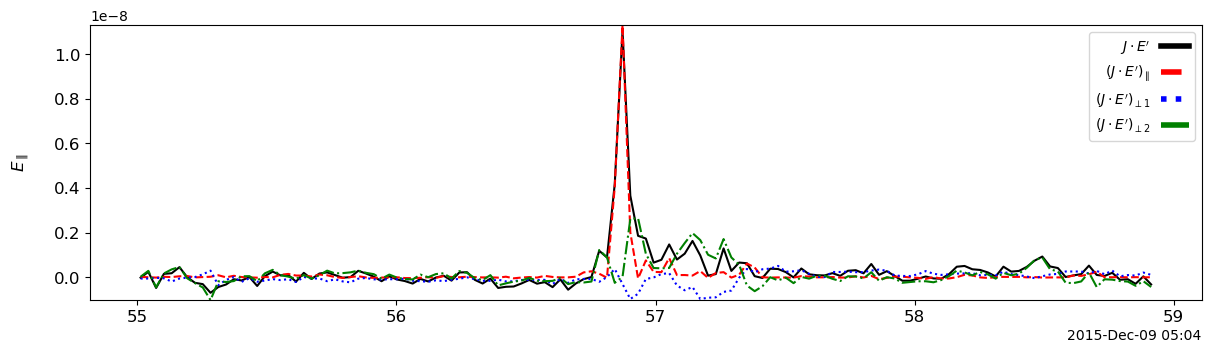

In [44]:
# Set legend names
pyspedas.options('combined_je', 'legend_names', ['$J \\cdot E^{\\prime}$',
                                                   '$(J \\cdot E^{\\prime})_{\\parallel}$',
                                                   '$(J \\cdot E^{\\prime})_{\\perp 1}$',
                                                   '$(J \\cdot E^{\\prime})_{\\perp 2}$'])

# Set line colors
pyspedas.options('combined_je', 'colors', ['black', 'red', 'blue', 'green'])

# Set line styles (0: solid, 1: dashed, 2: dotted, 3: dash_dot)
pyspedas.options('combined_je', 'line_style', ['solid_line', 'dashed', 'dotted', 'dash_dot'])

# Set line width
pyspedas.options('combined_je', 'line_width', 1.5)

# Set y-axis label
pyspedas.options('combined_je', 'ytitle', '$E_{\\parallel}$')

# Plot
pyspedas.tplot('combined_je', xsize=12, ysize=3.5, 
               save_png='Fig4_Nov7_JdotE_comparison.png')

# pyspedas.tplot(['je_gse', 'je_par_fac', 'je_perp1_fac', 'je_perp2_fac'])